In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv("AirPassengers.csv")

In [9]:
from matplotlib.pylab import rcParams

In [13]:
rcParams['figure.figsize'] = (5, 5)

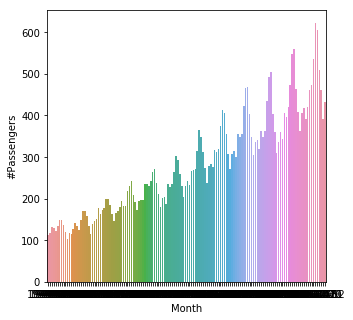

In [14]:
sns.barplot(x='Month', y='#Passengers', data=df)

In [15]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


<h2>Processando dados</h2>

In [27]:
treino_df = df.iloc[0:132]
teste_df = df.iloc[132:]

In [66]:
dados_treino = treino_df.get_values()

x_data = []
y_data = []

tam_janela = 3

for i in range(len(dados_treino)):
    
    aux = [int(j) for j in dados_treino[i, 0].split('-')] # Ano e Mês
    aux_janela = [0 for j in range(tam_janela)]
    
    idx = [j for j in reversed(range(max(0, i-4), max(i-1, 0)))]
    
    for j in range(len(idx)):
        aux_janela[j] = dados_treino[idx[j], 1]
        
    aux = aux + aux_janela
    aux2 = int(dados_treino[i, 1]) # Target #Passageiros
    
    x_data.append(aux)
    y_data.append(aux2)

In [67]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [69]:
# x_data

<h2>Criando o modelo</h2>

In [70]:
from sklearn.neural_network import MLPRegressor

In [71]:
mlp = MLPRegressor()
mlp.fit(x_data, y_data)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

<h2>Processar dados de teste</h2>

In [81]:
dados_teste = df.get_values()

x_test = []
y_test = []

tam_janela = 3

for i in range(132,144):
    
    aux = [int(j) for j in dados_teste[i, 0].split('-')] # Ano e Mês
    aux_janela = [0 for j in range(tam_janela)]
    
    idx = [j for j in reversed(range(max(0, i-4), max(i-1, 0)))]
    
    for j in range(len(idx)):
        aux_janela[j] = int(dados_teste[idx[j], 1])
        
    aux = aux + aux_janela
    aux2 = int(dados_teste[i, 1]) # Target #Passageiros
    
    x_test.append(aux)
    y_test.append(aux2)

In [83]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [85]:
y_pred = mlp.predict(x_test)

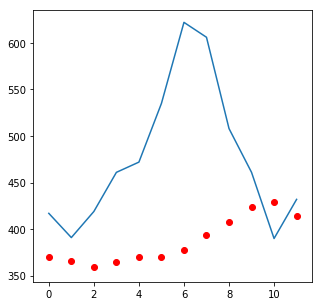

In [88]:
plt.plot(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), y_pred, c='r')

plt.show()